In [ ]:
print("hi")

hi


# **LOAN PREDICTION MODEL**

**Importing Libraries and dataset**

In [ ]:
# Package for data processing
import pandas as pd
import numpy as np
# Packages for data visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns
# scikit learn Packages for prediction algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# Package for model evaluation
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv('/content/dataset2.csv')

**Understanding the Dataset**

In [ ]:
print("Rows , Columns = ",data.shape,"\n")
data.head() #gives us the first 5 rows

Rows , Columns =  (614, 13) 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.describe() #gives us basic details about the data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes,
                         'amount_unique':data.nunique(),
                         'missing_values':data.isna().sum(),
                         'percentage_missing_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))
check_data(data)

,type,amount_unique,missing_values,percentage_missing_values(%)
Loan_ID,object,614,0,0.00
Gender,object,2,13,2.12
Married,object,2,3,0.49
Dependents,object,4,15,2.44
Education,object,2,0,0.00
Self_Employed,object,2,32,5.21
ApplicantIncome,int64,505,0,0.00
CoapplicantIncome,float64,287,0,0.00
LoanAmount,float64,203,22,3.58
Loan_Amount_Term,float64,10,14,2.28


**Our dataset has missing values in 7 columns , highest being in Credit_History (8.14%)**

Number of people who took loan by 'Gender':
Male      489
Female    112
Name: Gender, dtype: int64


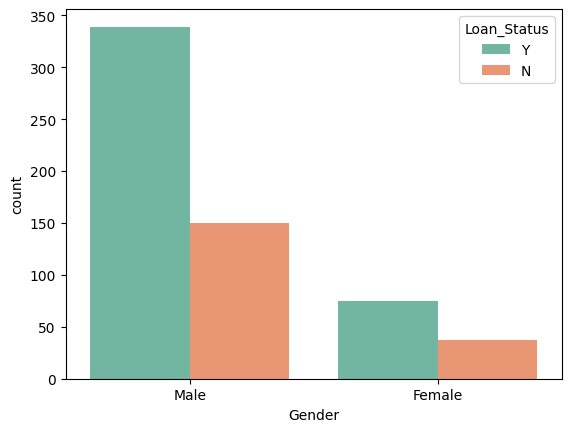

In [ ]:
print("Number of people who took loan by 'Gender':")
print(data['Gender'].value_counts())
ax = sns.countplot(x='Gender', hue="Loan_Status", data=data, palette = 'Set2')

Number of people who took loan by 'Marrital Status':
Yes    398
No     213
Name: Married, dtype: int64


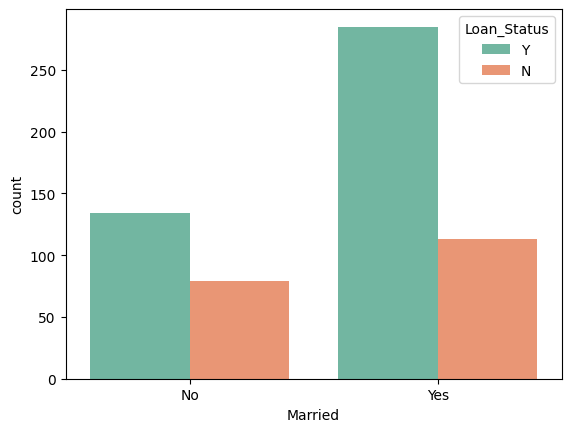

In [ ]:
print("Number of people who took loan by 'Marrital Status':")
print(data['Married'].value_counts())
ax = sns.countplot(x='Married', hue="Loan_Status", data=data, palette = 'Set2')

Number of people who take a loan group by 'Dependents':
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


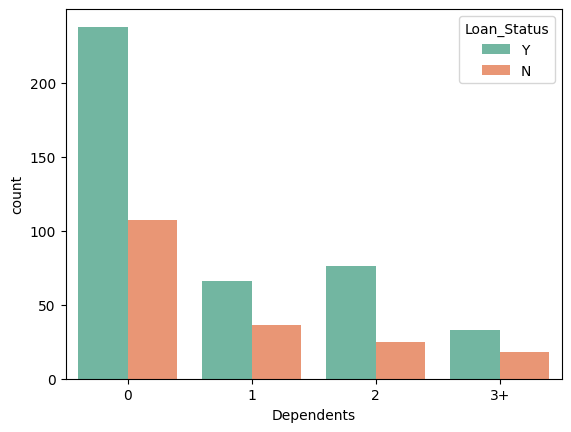

In [ ]:
print("Number of people who take a loan group by 'Dependents':")
print(data['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', hue="Loan_Status", data=data, palette = 'Set2')


Number of people who take a loan group by 'Education':
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


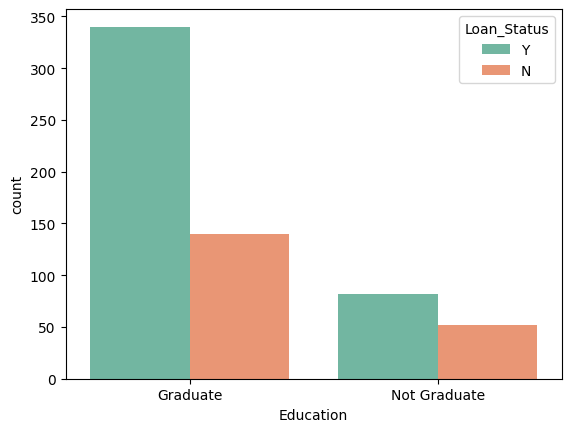

In [ ]:
print("Number of people who take a loan group by 'Education':")
print(data['Education'].value_counts())
ax = sns.countplot(x='Education', hue="Loan_Status", data=data, palette = 'Set2')

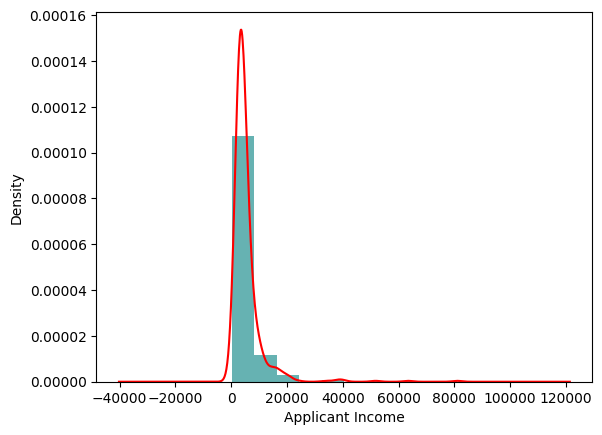

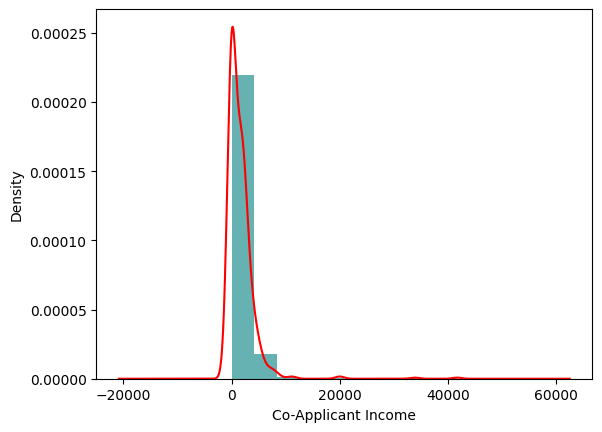

In [ ]:
ax = data["ApplicantIncome"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["ApplicantIncome"].plot(kind='density', color='red')
ax.set(xlabel='Applicant Income')
plt.show()

ax = data["CoapplicantIncome"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["CoapplicantIncome"].plot(kind='density', color='red')
ax.set(xlabel='Co-Applicant Income')
plt.show()

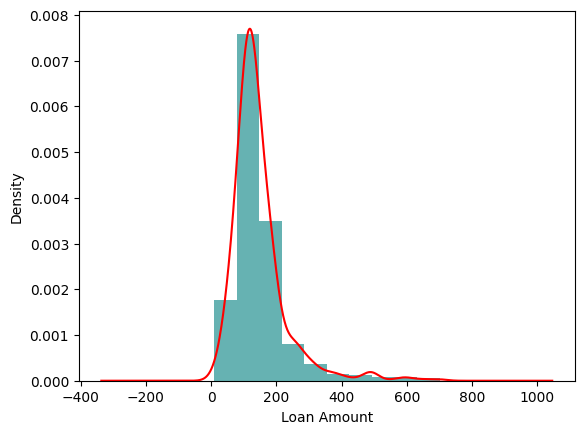

In [ ]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='red')
ax.set(xlabel='Loan Amount')
plt.show()

Number of people who take a loan group by 'Credit History':
1.0    475
0.0     89
Name: Credit_History, dtype: int64


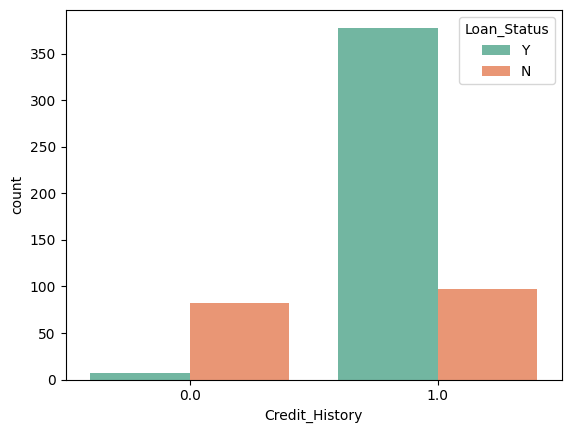

In [ ]:
print("Number of people who take a loan group by 'Credit History':")
print(data['Credit_History'].value_counts())
ax = sns.countplot(x='Credit_History', hue="Loan_Status", data=data, palette = 'Set2')

Number of people who take a loan group by 'Property Area':
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


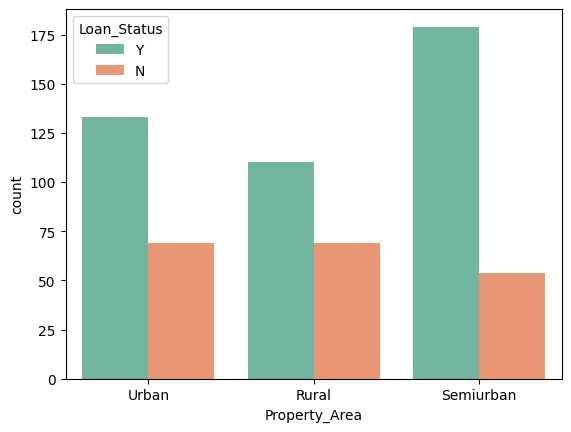

In [ ]:
print("Number of people who take a loan group by 'Property Area':")
print(data['Property_Area'].value_counts())
ax = sns.countplot(x='Property_Area', hue="Loan_Status", data=data, palette = 'Set2')

## **Data Preprocessing**

Missing values cannot simply be deleted as they are more in number.
To handle the missing values in data, we have 2 common methods:

1.If attribute is numeric, one approach is to replace those missing values with the average or median calculated across the entire numerical feature.

2.If the attribute is categorical(like gender),we impute the missing values by using the mode, which is the most frequently occurring category in the dataset.








We will use suitable method depending on following data.

In [ ]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes,
                         'amount_unique':data.nunique(),
                         'missing_values':data.isna().sum(),
                         'percentage_missing_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))
check_data(data)

,type,amount_unique,missing_values,percentage_missing_values(%)
Loan_ID,object,614,0,0.00
Gender,object,2,13,2.12
Married,object,2,3,0.49
Dependents,object,4,15,2.44
Education,object,2,0,0.00
Self_Employed,object,2,32,5.21
ApplicantIncome,int64,505,0,0.00
CoapplicantIncome,float64,287,0,0.00
LoanAmount,float64,203,22,3.58
Loan_Amount_Term,float64,10,14,2.28


Only for "LoanAmount" column, imputation is done by filling the data with its average value. For all the remaining features with missing values we use the most common answer(mode).

In [ ]:
new_data = data.copy()
new_data['Gender'].fillna(new_data['Gender'].value_counts().idxmax(), inplace=True)
new_data['Married'].fillna(new_data['Married'].value_counts().idxmax(), inplace=True)
new_data['Dependents'].fillna(new_data['Dependents'].value_counts().idxmax(), inplace=True)
new_data['Self_Employed'].fillna(new_data['Self_Employed'].value_counts().idxmax(), inplace=True)
new_data["LoanAmount"].fillna(new_data["LoanAmount"].mean(skipna=True), inplace=True)
new_data['Loan_Amount_Term'].fillna(new_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
new_data['Credit_History'].fillna(new_data['Credit_History'].value_counts().idxmax(), inplace=True)
# Check missing value
new_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Previous information but revised
check_data(new_data)

,type,amount_unique,missing_values,percentage_missing_values(%)
Loan_ID,object,614,0,0.0
Gender,object,2,0,0.0
Married,object,2,0,0.0
Dependents,object,4,0,0.0
Education,object,2,0,0.0
Self_Employed,object,2,0,0.0
ApplicantIncome,int64,505,0,0.0
CoapplicantIncome,float64,287,0,0.0
LoanAmount,float64,204,0,0.0
Loan_Amount_Term,float64,10,0,0.0


 **Next we convert Categorical Data into Numerical Data for performing Operations. We can use the fit_transform method in scikit learn instead of manually replacing for each feature**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
new_data[columns_to_encode] = new_data[columns_to_encode].apply(label_encoder.fit_transform)


In [ ]:
#checking the changes applied.
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


**Correlation:**

**The next step is to look at the correlation between features , especially with "Loan_Status". The results of the correlation of each feature will be mapped in a Heatmap graph.**

<ipython-input-32-1c92d7d61e13>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(new_data.corr(),2), annot=True, cmap="coolwarm")


<Axes: >

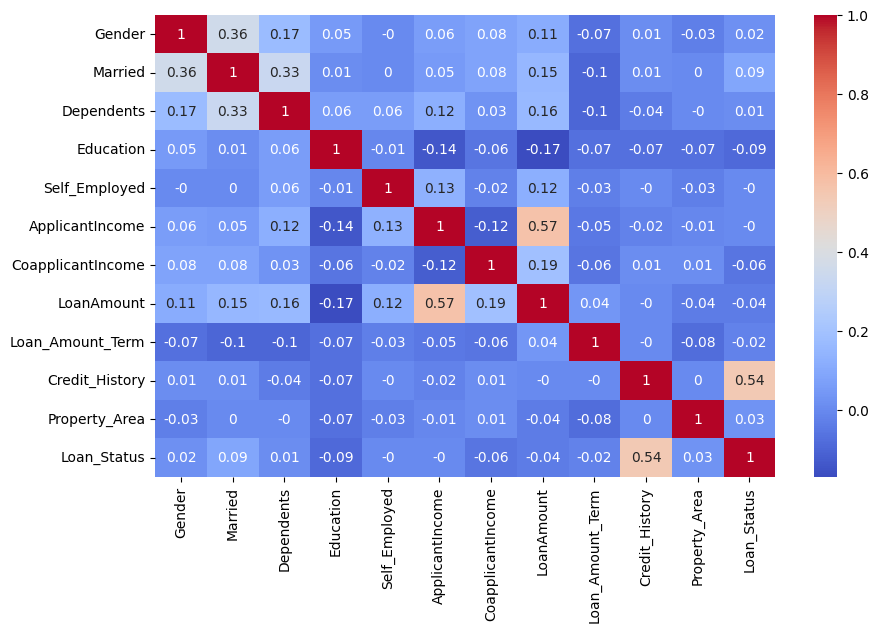

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(round(new_data.corr(),2), annot=True, cmap="coolwarm")


**Based on the results obtained, none of the correlation coefficients with the target variable exceed 0.7. This suggests a weak correlation or possibly no correlation between the features and the target. Consequently, all these features will be considered for use in subsequent result prediction.**

 **Out of 11 features, the feature 'Loan_ID' was not taken into consideration. Therefore, only 10 other features are used in determining loan approval predictions.**



In [ ]:
x = new_data.iloc[:,1:12]
y = new_data.iloc[:,12]
print("Shape of x ", x.shape)
print("Shape of y ", y.shape)
x.head()

Shape of x  (614, 11)
Shape of y  (614,)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# **ML Model**

1. Decision Tree
2. Random Forest
3. K-Nearest Neighbor
4. Gaussian Naive Bayes


1. Decision tree model with a maximum depth of 1 and considering up to 8 features for each split decision. The specified max_features parameter helps control the tree's complexity, preventing overfitting. Cross-validation is then employed to assess the model's classification accuracy.








In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',
                             max_depth=1,
                             max_features=8)
dtc_score = round(cross_val_score(dtc, x, y, cv=10).mean()*100, 2)
print('The accuration of classification using Decision Tree is %.2f%%' %(dtc_score))

The accuration of classification using Decision Tree is 78.35%


2. This code establishes a K-Nearest Neighbors (KNN) classifier configured with 13 neighbors, utilizing the Manhattan distance metric (p=1), uniform weights, and the adoption of the KD tree algorithm for efficient nearest neighbor searches. It evaluates through 10-fold cross-validation and computes the average accuracy.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13,
                           p=1,
                           weights='uniform',
                           algorithm='kd_tree')
knn_score = round(cross_val_score(knn, x, y, cv=10).mean()*100, 2)
print('The accuration of classification using K-Nearest Neighbor is %.2f%%' %(knn_score))

The accuration of classification using K-Nearest Neighbor is 68.23%


 3. A Random Forest is an ensemble of decision treesThe code essentially creates a Random Forest Classifier,by specifying 100 trees with max depth of 3, trains and evaluates it using 10-fold cross-validation, and prints the accuracy of the model(mean of on different subsets of the data).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth=3,
                             max_features=3)

# Train the model on the training set
rfc.fit(x_train, y_train)

# Make predictions on the test set
predictions = rfc.predict(x_test)

# Evaluate the accuracy of the model
accuracy_rfc = accuracy_score(y_test, predictions)
print('The accuracy of the classification using Random Forest is %.2f%%' % (accuracy_rfc * 100))


The accuracy of the classification using Random Forest is 78.86%


In [ ]:
import pickle
with open('rfc_model.pkl','wb') as model_file:
  pickle.dump(rfc, model_file)

In [ ]:
with open('rfc_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

abc = [[1,1,3,1,0,50,240.0,3000.255000,900.0,1.0,2]]
new_predictions = loaded_model.predict(abc)
print(new_predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


4. Gaussian Naive Bayes specifically assumes that the features are normally distributed within each class. This assumption simplifies the estimation of the probability distribution and leads to a computationally efficient algorithm.
This code implements a (GNB) classifier, a probabilistic algorithm suitable for classification tasks and accommodates situations where features follow a Gaussian (normal) distribution.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb_score = round(cross_val_score(gnb, x, y, cv=10).mean()*100, 2)
gnb.fit(x_train, y_train)

predictions = gnb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, predictions)
print('The accuracy of the classification using Gaussian Naive Bayes is %.2f%%' % (accuracy_gnb * 100))

# Save the trained model using pickle
with open('gnb_model.pkl', 'wb') as gnb_file:
    pickle.dump(gnb, gnb_file)

# Load the saved model
with open('gnb_model.pkl', 'rb') as gnb_file:
    loaded_gnb_model = pickle.load(gnb_file)




The accuracy of the classification using Gaussian Naive Bayes is 78.86%


In [ ]:
new_data = [[1,1,2,1,0,5000,240.0,80.255000,360.0,1.0,2]]
actual_predictions = loaded_gnb_model.predict(new_data)
print(actual_predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In simpler terms, a normal distribution describes a symmetric, bell-shaped curve where most data points cluster around the mean, and the probability decreases as you move away from the mean.

# **Model Evalutaion Result**

In [ ]:
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'K-Nearest Neighbor', 'Gaussian Naive Bayes'],
    'Accuracy (%)' : [dtc_score, accuracy_rfc*100, knn_score, accuracy_gnb*100]})

print(models)
print('\nThe Best model is {} with a accuracy of {}%'.format(models.loc[models['Accuracy (%)'].idxmax(), 'Model'],
                                                           models['Accuracy (%)'].max()))

                  Model  Accuracy (%)
0         Decision Tree     78.350000
1         Random Forest     78.861789
2    K-Nearest Neighbor     68.230000
3  Gaussian Naive Bayes     78.861789

The Best model is Random Forest with a accuracy of 78.86178861788618%


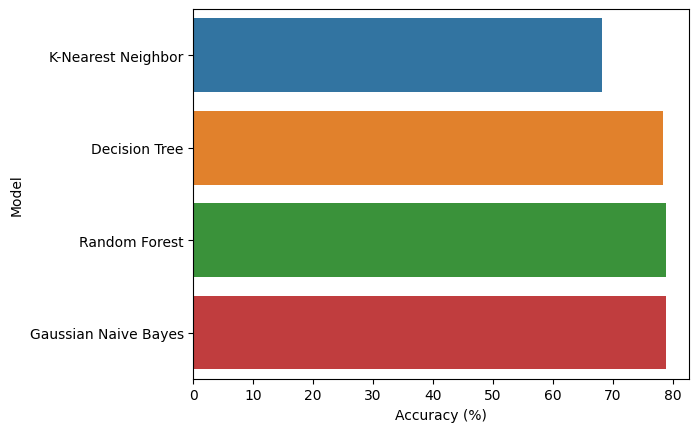

In [ ]:
# Visualizing model evaluation result from each of the algorithms .
sns.barplot(x = 'Accuracy (%)', y = 'Model',
            data = models.sort_values(by = 'Accuracy (%)', ascending = True))
plt.show()